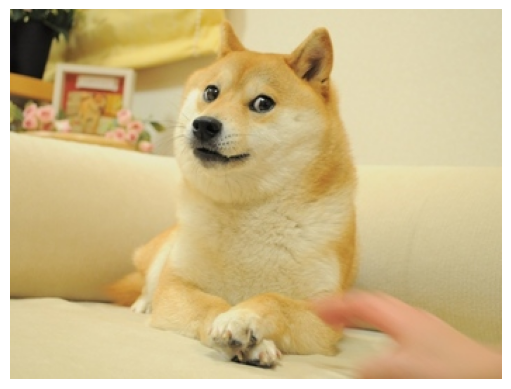

In [2]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

image = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/en/5/5f/Original_Doge_meme.jpg', stream=True).raw)
plt.imshow(image)
plt.axis('off')
plt.show()

To load a ViT model we just need to specify the image-classification pipeline

In [3]:
import pandas as pd
from transformers import pipeline

image_classifier = pipeline('image-classification')
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

/home/ssanchez/env/transformers/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/ssanchez/env/transformers/lib/python3.8/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feed

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,label,score
0,"dingo, warrigal, warragal, Canis dingo",0.432135
1,"Eskimo dog, husky",0.135650
2,"Norwegian elkhound, elkhound",0.079534
3,Chihuahua,0.060101
4,kelpie,0.042557


# Tables

In [4]:
book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12, 
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74, 
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121, 
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141, 
     "end_page": 144}
]

In [5]:
table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page']
table = table.astype(str)
table

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,10
1,1,Text classification,12,48,36
2,2,Named Entity Recognition,49,73,24
3,3,Question Answering,74,120,46
4,4,Summarization,121,140,19
5,5,Conclusion,141,144,3


In [6]:
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?", "What is the total number of pages?",
          "On which page does the chapter about question-answering start?",
          "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

No model was supplied, defaulted to google/tapas-base-finetuned-wtq and revision e3dde19 (https://huggingface.co/google/tapas-base-finetuned-wtq).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

/home/ssanchez/env/transformers/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [7]:
for query, pred in zip(queries, preds):
    print(query)
    if pred["aggregator"] == "NONE":
        print("Predicted answer: " + pred["answer"])
    else:
        print("Predicted answer: " + pred["answer"])
    print('='*50)

What's the topic in chapter 4?
Predicted answer: Summarization
What is the total number of pages?
Predicted answer: SUM > 10, 36, 24, 46, 19, 3
On which page does the chapter about question-answering start?
Predicted answer: AVERAGE > 74
How many chapters have more than 20 pages?
Predicted answer: COUNT > 1, 2, 3


# Multimodal Transformers
## Speech-to-Text
The wav2vec 2.0 family of models use a transformer layer and a CNN. Let's load a pretrained model that was trained on 960 hours of speech audio

In [13]:
asr = pipeline('automatic-speech-recognition')

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [15]:
from datasets import load_dataset

ds = load_dataset("superb", "asr", split="validation[:1]")
print(ds[0])

{'file': '/home/ssanchez/.cache/huggingface/datasets/downloads/extracted/edec2e33623a16d3aaa7c5a339ee1e0fe74ec0aaecf55370681e463cbc517c33/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'audio': {'path': '/home/ssanchez/.cache/huggingface/datasets/downloads/extracted/edec2e33623a16d3aaa7c5a339ee1e0fe74ec0aaecf55370681e463cbc517c33/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'array': array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
       0.0010376 ]), 'sampling_rate': 16000}, 'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL', 'speaker_id': 1272, 'chapter_id': 128104, 'id': '1272-128104-0000'}


here we can see that the audio file column is stored in the FLAC coding format. To convert the audio to an array of floats, we can use the *SoundFile* library.

In [16]:
import soundfile as sf

def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

ds = ds.map(map_to_array)

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [17]:
from IPython.display import Audio

display(Audio(ds[0]['speech'], rate=16000))

In [21]:
import numpy as np

np.array(ds[0]["speech"])

array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
       0.0010376 ])

In [22]:
pred = asr(np.array(ds[0]["speech"]))
print(pred)

{'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL'}


This transciption seems to be correct. We can see that some punctuation is missing, but this is hard to get from audio alone and could be added in a postprocessing step.

# CLIP

For image-to-text tasks, we instatiate a *processor* that consists of a *feature extractor* and a tokenizer.
Feature extractor --> convert image into a form suitable for the model
tokenizer --> responsible for decoding the model's predictions into text:

In [23]:
from transformers import CLIPProcessor, CLIPModel

clip_ckpt = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(clip_ckpt)
processor = CLIPProcessor.from_pretrained(clip_ckpt)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

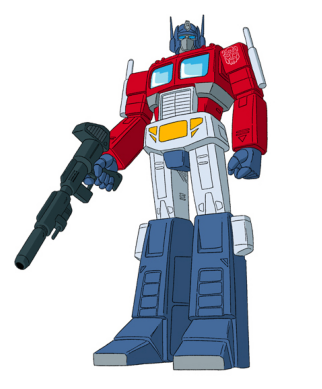

In [24]:
image = Image.open(requests.get('https://static.wikia.nocookie.net/transformers/images/5/57/Optimus_Prime.jpg/revision/latest?cb=20230911000229&path-prefix=es', stream=True).raw)
plt.imshow(image)
plt.axis('off')
plt.show()

In [25]:
import torch

texts = ["a photo of a transformer", "a photo of a robot", "a photo of agi"]
inputs = processor(text=texts, images=image, return_tensors='pt', padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.8610, 0.1313, 0.0076]])